In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from model.train import data_preparation, data_split, seq_preparation, train_model
from model.evaluate import run_pipeline

### Data exploration

In [3]:
data = pd.read_csv("data/synthetic_data.csv")

In [4]:
data.head(10)

,student_id,time_stamp,skill_id,correct
0,S001,0,1,0
1,S001,1,2,1
2,S001,2,3,0
3,S001,3,4,1
4,S001,4,6,1
5,S001,5,5,1
6,S001,6,7,1
7,S001,7,5,1
8,S001,8,1,1
9,S001,9,8,1


In [5]:
data.tail(10)

,student_id,time_stamp,skill_id,correct
1880,S100,10,4,1
1881,S100,11,3,1
1882,S100,12,1,0
1883,S100,13,3,1
1884,S100,14,4,1
1885,S100,15,5,1
1886,S100,16,6,1
1887,S100,17,7,1
1888,S100,18,8,1
1889,S100,19,2,1


In [6]:
data.describe()

,time_stamp,skill_id,correct
count,1890.000000,1890.000000,1890.000000
mean,9.269841,4.095238,0.516402
std,5.771472,2.254207,0.499863
min,0.000000,1.000000,0.000000
25%,4.000000,2.000000,0.000000
50%,9.000000,4.000000,1.000000
75%,14.000000,6.000000,1.000000
max,19.000000,8.000000,1.000000


In [7]:
data.shape

(1890, 4)

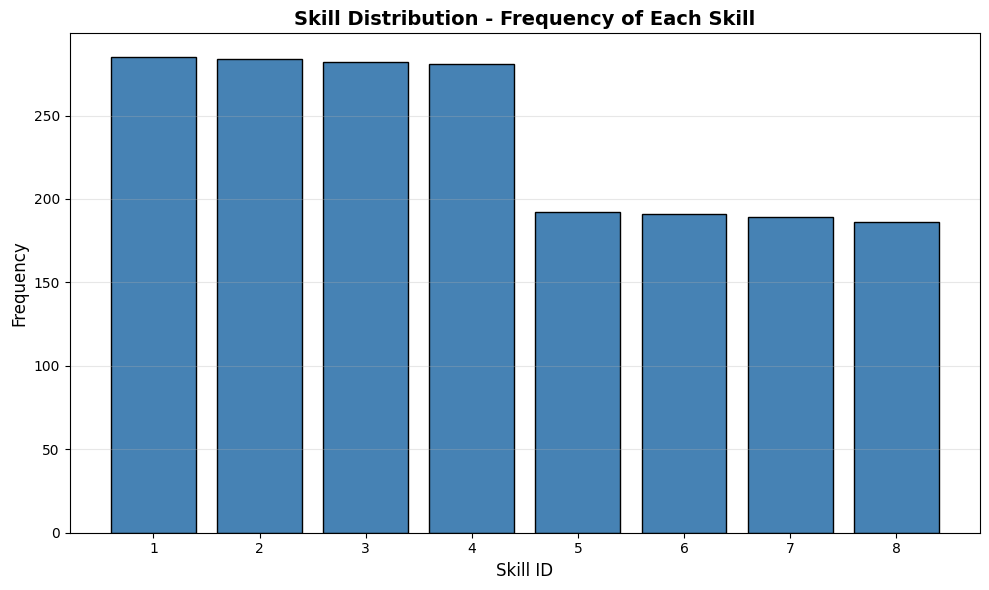

In [ ]:
# Skill Distribution
skill_counts = data['skill_id'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(skill_counts.index, skill_counts.values, color='blue', edgecolor='black')

plt.xlabel('Skill ID', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.title('Skill Distribution - Frequency of Each Skill', fontsize=14, fontweight='bold')

plt.xticks(range(1, 9))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

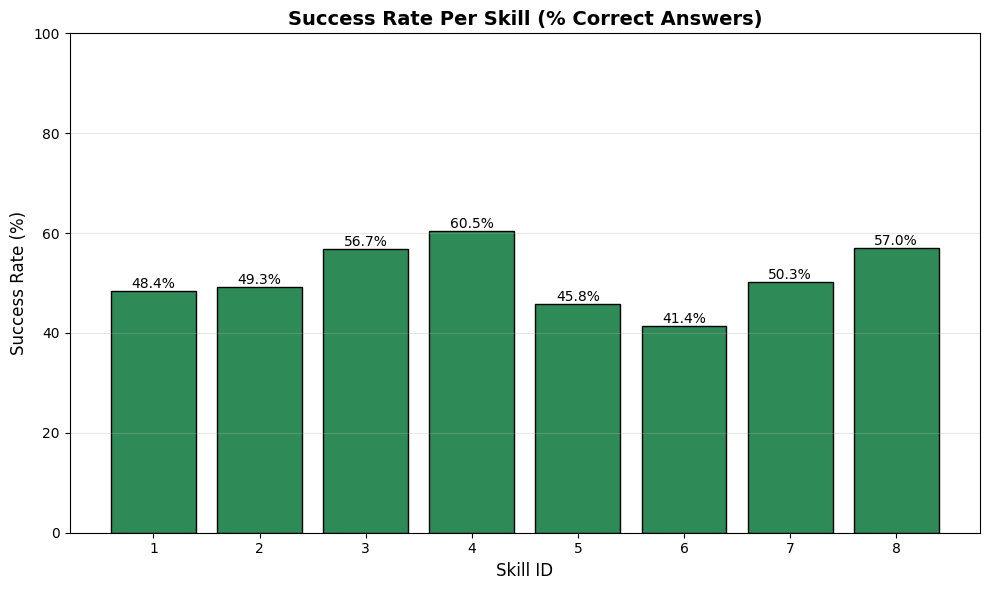

In [11]:
# success rate per skill
success_rate = data.groupby('skill_id')['correct'].mean() * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(success_rate.index, success_rate.values, color='seagreen', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Skill ID', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)

plt.title('Success Rate Per Skill (% Correct Answers)', fontsize=14, fontweight='bold')

plt.xticks(range(1, 9))
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

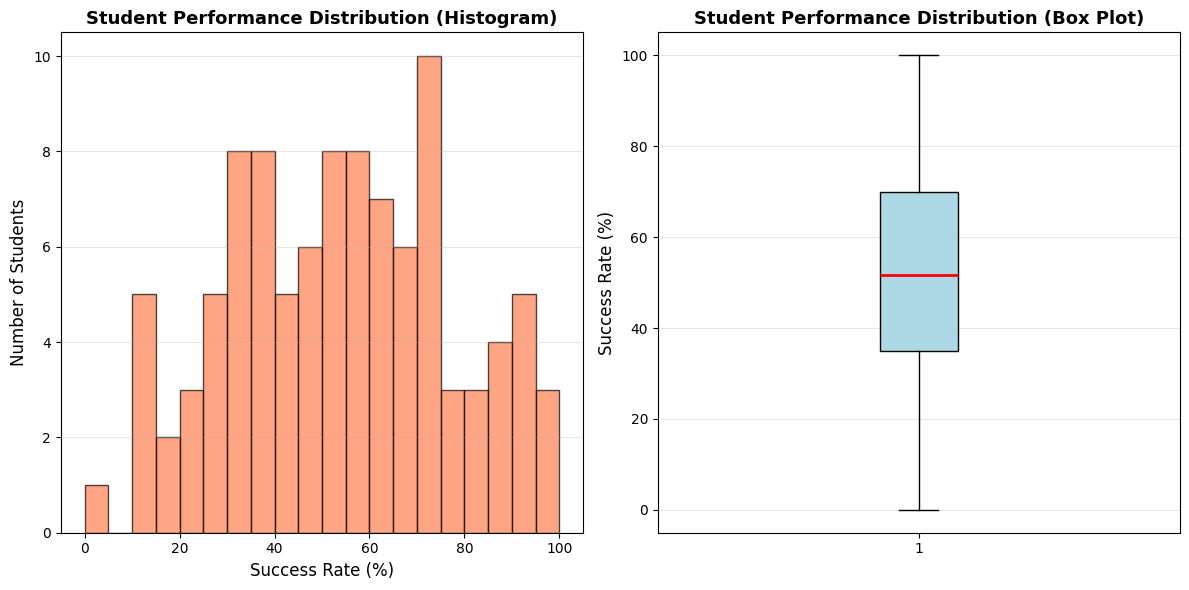

In [13]:
# student performance distribution
student_performance = data.groupby('student_id')['correct'].mean() * 100

plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(student_performance, bins=20, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Success Rate (%)', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Student Performance Distribution (Histogram)', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(student_performance, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Success Rate (%)', fontsize=12)
plt.title('Student Performance Distribution (Box Plot)', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### Model training

In [40]:
sequences = data_preparation()
train, test = data_split(sequences)
X_train, y_train = seq_preparation(train)
X_test, y_test = seq_preparation(test)
train_model(X_train, y_train)

Epoch 1/50 - Loss: 0.689
Epoch 2/50 - Loss: 0.668
Epoch 3/50 - Loss: 0.656
Epoch 4/50 - Loss: 0.628
Epoch 5/50 - Loss: 0.620
Epoch 6/50 - Loss: 0.610
Epoch 7/50 - Loss: 0.601
Epoch 8/50 - Loss: 0.590
Epoch 9/50 - Loss: 0.580
Epoch 10/50 - Loss: 0.572
Epoch 11/50 - Loss: 0.563
Epoch 12/50 - Loss: 0.554
Epoch 13/50 - Loss: 0.549
Epoch 14/50 - Loss: 0.529
Epoch 15/50 - Loss: 0.520
Epoch 16/50 - Loss: 0.508
Epoch 17/50 - Loss: 0.497
Epoch 18/50 - Loss: 0.491
Epoch 19/50 - Loss: 0.474
Epoch 20/50 - Loss: 0.456
Epoch 21/50 - Loss: 0.443
Epoch 22/50 - Loss: 0.442
Epoch 23/50 - Loss: 0.426
Epoch 24/50 - Loss: 0.419
Epoch 25/50 - Loss: 0.412
Epoch 26/50 - Loss: 0.403
Epoch 27/50 - Loss: 0.407
Epoch 28/50 - Loss: 0.399
Epoch 29/50 - Loss: 0.380
Epoch 30/50 - Loss: 0.368
Epoch 31/50 - Loss: 0.350
Epoch 32/50 - Loss: 0.347
Epoch 33/50 - Loss: 0.341
Epoch 34/50 - Loss: 0.332
Epoch 35/50 - Loss: 0.312
Epoch 36/50 - Loss: 0.317
Epoch 37/50 - Loss: 0.318
Epoch 38/50 - Loss: 0.284
Epoch 39/50 - Loss: 0

DKTModel(
  (sigmoid): Sigmoid()
  (gru): GRU(16, 128, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=8, bias=True)
)

### Model evaluation

In [36]:
run_pipeline()

Accuracy: 0.629
AUC-ROC: 0.659
